In [1]:
from __future__ import division
from numpy import array, shape, where, in1d
import math
import time
import nose
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tkinter as tk
from tkinter import *


In [2]:
# Compute descrete random variables 
class InformationTheoryTool:
    
    def __init__(self, data):
        """
        """
        # Check if all rows have the same length
        assert (len(data.shape) == 2)
        # Save data
        self.data = data
        self.n_rows = data.shape[0]
        self.n_cols = data.shape[1]
        
        
    def single_entropy(self, x_index, log_base, debug = False):
        """
        Calculate the entropy of a random variable
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index <= self.n_rows)
        # Variable to return entropy
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        # Print debug info
        if debug:
            print('Entropy of')
            #print(data[x_index])
        # For each random
        for value_x in values_x:
            px = shape(where(self.data[x_index]==value_x))[1] / self.n_cols
            if px > 0.0:
                summation += px * math.log(px, log_base)
            if debug:
                print('(%d) px:%f' % (value_x, px))
        if summation == 0.0:
            return summation
        else:
            return - summation
        
        
    def entropy(self, x_index, y_index, log_base, debug = False):
        """
        Calculate the entropy between two random variable
        """
        assert (x_index >= 0 and x_index <= self.n_rows)
        assert (y_index >= 0 and y_index <= self.n_rows)
        # Variable to return MI
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        values_y = set(self.data[y_index])
        # Print debug info
        if debug:
            print('Entropy between')
            print(self.data[x_index])
            print(self.data[y_index])
        # For each random
        for value_x in values_x:
            for value_y in values_y:
                pxy = len(where(in1d(where(self.data[x_index]==value_x)[0], 
                                where(self.data[y_index]==value_y)[0])==True)[0]) / self.n_cols
                if pxy > 0.0:
                    summation += pxy * math.log(pxy, log_base)
                if debug:
                    print('(%d,%d) pxy:%f' % (value_x, value_y, pxy))
        if summation == 0.0:
            return summation
        else:
            return - summation
        
        
        
    def mutual_information(self, x_index, y_index, log_base, debug = False):
        """
        Calculate and return Mutual information between two random variables
        """
        # Check if index are into the bounds
        assert (x_index >= 0 and x_index <= self.n_rows)
        assert (y_index >= 0 and y_index <= self.n_rows)
        # Variable to return MI
        summation = 0.0
        # Get unique values of random variables
        values_x = set(self.data[x_index])
        values_y = set(self.data[y_index])
        # Print debug info
        if debug:
            print('MI between')
            print(self.data[x_index])
            print(self.data[y_index])
        # For each random
        for value_x in values_x:
            for value_y in values_y:
                px = shape(where(self.data[x_index]==value_x))[1] / self.n_cols
                py = shape(where(self.data[y_index]==value_y))[1] / self.n_cols
                pxy = len(where(in1d(where(self.data[x_index]==value_x)[0], 
                                where(self.data[y_index]==value_y)[0])==True)[0]) / self.n_cols
                if pxy > 0.0:
                    summation += pxy * math.log((pxy / (px*py)), log_base)
                if debug:
                    print('(%d,%d) px:%f py:%f pxy:%f' % (value_x, value_y, px, py, pxy))
        return summation
    
    

In [3]:

def visual(x1,x2,t):
    
    # Visualize X and Y and their discrepancy (error rate)
    colors = ['#E69F00', '#56B4E9']
    names = ['Intended input','Actual input']
    plt.hist([x1,x2], bins = int(180/20), normed=False, color = colors, label = names)

    plt.legend(prop={'size': 12}, bbox_to_anchor=(0.9, 1.2), ncol=2)
    plt.xlabel('Items')
    plt.ylabel('Counts')

    print("error rate:", np.mean(np.array(x1) != np.array(x2)))

    # Using the tool above to compute mutual information of X and Y

    MI_XY = [x1,x2]
    data = array(MI_XY)# Create object
    it_tool = InformationTheoryTool(data)

    """
    I(X;Y) = H(X) - H(X|Y)
    """
    Entropy_X = it_tool.single_entropy(0,2)
    Mutual_Information = it_tool.mutual_information(0, 1, 2)
    Equivocation = Entropy_X - Mutual_Information

    print("Entropy: ", Entropy_X, "bits")
    print("Mutual Information: ", Mutual_Information, "bits")
    print("Transmitted information percentage:", Mutual_Information/Entropy_X)
    print("Equivocation: ", Equivocation, "bits")

    if t != 0:
        print("Throughput: ", Mutual_Information/t, "bit/s")
    else:
        print("Throughput is not available")

    

error rate: 0.25
Entropy:  2.0 bits
Mutual Information:  1.311278124459133 bits
Transmitted information percentage: 0.6556390622295665
Equivocation:  0.6887218755408671 bits
Throughput is not available


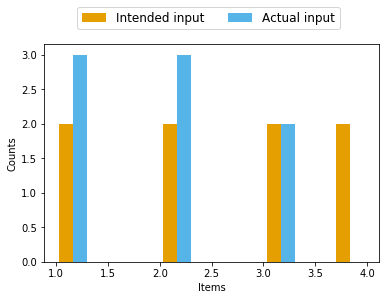

In [7]:
# Two random variables X and Y

## TO DO: change the values that X and Y can take and the distributions to see how mutual information changes

## TO DO: play it with your own data
X = [1,1,2,2,3,3,4,4]
Y = [1,1,2,2,3,3,1,2]

visual(X,Y,0)



In [5]:
# Command selection on a menu

root = tk.Tk()

# Insert a menu bar on the main window
menubar = Menu(root)
root.config(menu=menubar)

# Create a menu button labeled "Command Selection" that brings up a menu
filemenu = Menu(menubar)
menubar.add_cascade(label='Command Selection', menu=filemenu)
    
# the number of items in the menu. TO DO: try change it
n = 5

X_stimuli = []
Y_response = []
time_stamp = []

stimulus = tk.Text(root, height = 2, width = 30)
sti = random.randint(1,n)
X_stimuli.append(sti)
stimulus.insert(tk.END, "Please select: " + str(sti))
stimulus.grid(row = 0, column = 1)

# When clicking on each item, your response is collected

def onclick(click): 
    Y_response.append(int(click))     
    time_stamp.append(time.time())
    stimulus.delete('1.0', tk.END)
    next_stimulus = random.randint(1,n)
    X_stimuli.append(next_stimulus)
    stimulus.insert(tk.END, "Please select: " + str(next_stimulus))
    
for i in range(n):
    filemenu.add_command(label = str(i+1), 
                         command = lambda i=i: onclick(i+1))

root.mainloop()

X_stimuli = X_stimuli[:-1]

[3, 2, 1, 1, 4, 2, 3, 3, 3, 4, 3, 1, 1, 1, 1, 3]
[3, 2, 1, 1, 4, 2, 3, 3, 3, 4, 3, 1, 1, 1, 1, 3]
Average time:  1.4024399369955063 s
error rate: 0.0
Entropy:  1.8112781244591327 bits
Mutual Information:  1.8112781244591327 bits
Transmitted information percentage: 1.0
Equivocation:  0.0 bits
Throughput:  1.2915192135354432 bit/s


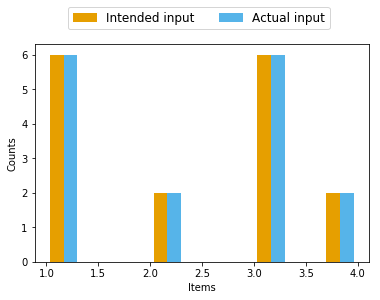

In [6]:
# Visualize your answer:

if (len(time_stamp) == 0):
    print("No data available")
else:
    print(X_stimuli)
    print(Y_response)
    average_time = (time_stamp[len(time_stamp)-1] - time_stamp[0])/len(Y_response)
    print("Average time: ", average_time, "s")
    visual(X_stimuli, Y_response, average_time)


# TO DO: do it as fast and as accuractly as you can. 
# Tell each other your information transmission efficiency (bit/s)

# TO DO: change the distribution